# US-2020-Election-Campaign-Youtube-Comments-Sentiment-Analysis-RNN-Bidirect--lstm-Flask-Deployment

# Data Scrapping From Top US Youtube Channels

In [66]:
from selenium import webdriver
from selenium.common import exceptions
import sys
import time
import pandas as pd


class Youtube_Comment_Scrapper():
    
    def __init__(self):
        
        print('Scrapper Ogject Created')
        
        
        

    def __scrape(self,url):
        """
        Extracts the comments from the Youtube video given by the URL.
        Args:
            url (str): The URL to the Youtube video
        Raises:
            selenium.common.exceptions.NoSuchElementException:
            When certain elements to look for cannot be found
        """

        """ Note: replace argument with absolute path to the driver executable."""
        driver = webdriver.Chrome('chromedriver.exe')

        """ Navigates to the URL, maximizes the current window, and
        # then suspends execution for (at least) 5 seconds (this
        # gives time for the page to load)."""
        driver.get(url)
        driver.maximize_window()
        time.sleep(5)

        try:
            """ Extract the elements storing the video title and
            # comment section."""
            title = driver.find_element_by_xpath('//*[@id="container"]/h1/yt-formatted-string').text
            comment_section = driver.find_element_by_xpath('//*[@id="comments"]')
        except exceptions.NoSuchElementException:
            """ Note: Youtube may have changed their HTML layouts for
            # videos, so raise an error for sanity sake in case the
            # elements provided cannot be found anymore."""
            error = "Error: Double check selector OR "
            error += "element may not yet be on the screen at the time of the find operation"
            print(error)

        """ Scroll into view the comment section, then allow some time
        # for everything to be loaded as necessary."""
        driver.execute_script("arguments[0].scrollIntoView();", comment_section)
        time.sleep(5)

        """ Scroll all the way down to the bottom in order to get all the
        # elements loaded (since Youtube dynamically loads them)."""
        last_height = driver.execute_script("return document.documentElement.scrollHeight")

        while True:
            """ Scroll down 'til "next load"."""
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
            driver.execute_script("window.scrollTo(0, 99901290000);")

            """ Wait to load everything thus far."""
            time.sleep(5)

            """ Calculate new scroll height and compare with last scroll height."""
            new_height = driver.execute_script("return document.documentElement.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        """ One last scroll just in case."""
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        try:
            """ Extract the elements storing the usernames and comments."""
            username_elems = driver.find_elements_by_xpath('//*[@id="author-text"]')
            comment_elems = driver.find_elements_by_xpath('//*[@id="content-text"]')
        except exceptions.NoSuchElementException:
            error = "Error: Double check selector OR "
            error += "element may not yet be on the screen at the time of the find operation"
            print(error)

        print("> VIDEO TITLE: " + title + "\n")
        data=[]
        for username, comment in zip(username_elems, comment_elems):
            data.append({'Name': username.text, 'Comment': comment.text})
        df = pd.DataFrame(data)
        driver.close()
        return df
    
    
    def scrap_links(self):
        
        try:
        
            y_channel1 = 'https://www.youtube.com/watch?v=uf3Ps5dHxrE'
            y_channel2 = 'https://www.youtube.com/watch?v=yGPfKkjDIts'
            y_channel3 = 'https://www.youtube.com/watch?v=RHISJrOODJ4'
            y_channel4 = 'https://www.youtube.com/watch?v=FdAh2HJ98WE'
            y_channel5 = 'https://www.youtube.com/watch?v=5mRXTO05Ihg'
            y_channel6 = 'https://www.youtube.com/watch?v=jFoTW91m2_8'
            y_channel7 = 'https://www.youtube.com/watch?v=9HnKFUNlcfY'
            y_channel8 = 'https://www.youtube.com/watch?v=ytc6VScJUcE'

            df1 = self.__scrape(y_channel1)
            print(df1.shape)
            df2 = self.__scrape(y_channel2)
            print(df2.shape)
            df3 = self.__scrape(y_channel3)
            print(df3.shape)
            df4 = self.__scrape(y_channel4)
            print(df4.shape)
            df5 = self.__scrape(y_channel5)
            print(df5.shape)
            df6 = self.__scrape(y_channel6)
            print(df6.shape)
            df7 = self.__scrape(y_channel7)
            print(df7.shape)
            df8 = self.__scrape(y_channel8)
            print(df8.shape)

            df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
        
        except exceptions.NoSuchElementException:
            error = "Process error Identified "

        return df

In [67]:
SC = Youtube_Comment_Scrapper()

Scrapper Ogject Created


In [68]:
df = SC.scrap_links()
print(df.shape)
df.head()

> VIDEO TITLE: The U.S. Presidential Election: Can Donald Trump once again defy the polls? | Four Corners

(1575, 2)
> VIDEO TITLE: Trump v Biden: The Final Debate

(1574, 2)
> VIDEO TITLE: Full Debate: President Trump and Joe Biden Square Off for Final Time Ahead of Election | WSJ

(1577, 2)
> VIDEO TITLE: President Donald Trump: The 60 Minutes 2020 Election Interview

(1579, 2)
> VIDEO TITLE: With Five Days to Go, Trump and the GOP Campaign Against Reality: A Closer Look

(1579, 2)
> VIDEO TITLE: Trump holds MAGA rally in Tampa, FL

(1526, 2)
> VIDEO TITLE: Trump and Biden face off in chaotic first 2020 presidential debate | FULL DEBATE

(1575, 2)
> VIDEO TITLE: Trump hits Biden on alleged profits from China, Ukraine

(1574, 2)
(12559, 2)


,Name,Comment
0,Albert Floyd,Ha ha wealthy elites calling others the wealth...
1,Jose Peixoto,Here is how a person like Trump got elected: ...
2,J Dizzle,The village people value money over their own ...
3,maria cronin,I’m so embarrassed and scared for our nation
4,Terry Wilson,Why do people think going bankrupt time after ...


# Text Preprocessing

In [86]:
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
class Data_Preparation():
    
    def __init__(self):
        
        print('Data Preparation Ogject Created')
        
        
    def __fetch_sentiment_using_textblob(self,text):
        
        analysis = TextBlob(text)
        return 'pos' if analysis.sentiment.polarity > 0 else 'neg'
    
    
    def Concat_Sentiments_to_DataFrame(self,data):
        
        sentiments_using_textblob = data.Comment.apply(lambda tweet: self.__fetch_sentiment_using_textblob(tweet))
        print("Sentiments Value Counts ::",pd.DataFrame(sentiments_using_textblob.value_counts()))
        data['sentiment'] = sentiments_using_textblob
        return data
    
    def Text_Processing(self,data):
        
        data =data.applymap(lambda s:s.lower() if type(s) == str else s)
        data = data[data['Comment']!='']
        data = data.drop_duplicates(subset=['Comment'], keep=False)
        data = data.reset_index(drop=True)
        data['Comment'] = data['Comment'].str.replace("[^a-zA-Z# ]", "")
        data = data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
        data = data[data['Comment']!='']
        data = data.drop_duplicates(subset=['Comment'], keep=False)
        data = data.reset_index(drop=True)
        data['Comment'] = data['Comment'].str.replace("[^a-zA-Z# ]", "")
        return data
    
    def Tokennizing_tweets(self,data):
    
        tokenized_tweet = data['Comment'].apply(lambda x: x.split())
        word_lemmatizer = WordNetLemmatizer()
        tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
        for i, tokens in enumerate(tokenized_tweet):
            tokenized_tweet[i] = ' '.join(tokens)
        data['Comment'] = tokenized_tweet
        data = data[['Comment','sentiment']]
        return data
    
    def __wordcloud(self,x):
        plt.figure(figsize=(14, 10))
        wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(x))
        plt.imshow(wordcloud)
        plt.axis("off")
        return wordcloud

    def Comments_WordCloud(self,data):

        all_words = ' '.join([text for text in data['Comment'][data.sentiment == 'pos']])
        all_words = all_words.split()
        self.__wordcloud(all_words)

In [87]:
DP = Data_Preparation()

Data Preparation Ogject Created


In [80]:
df = DP.Concat_Sentiments_to_DataFrame(df)
df.head()

Sentiments Value Counts ::      Comment
neg     7636
pos     4923


,Name,Comment,sentiment
0,Albert Floyd,Ha ha wealthy elites calling others the wealth...,pos
1,Jose Peixoto,Here is how a person like Trump got elected: ...,neg
2,J Dizzle,The village people value money over their own ...,pos
3,maria cronin,I’m so embarrassed and scared for our nation,neg
4,Terry Wilson,Why do people think going bankrupt time after ...,pos


In [84]:
df = DP.Text_Processing(df)
df.head()

,Name,Comment,sentiment
0,albert floyd,ha ha wealthy elites calling others the wealth...,pos
1,jose peixoto,here is how a person like trump got elected y...,neg
2,j dizzle,the village people value money over their own ...,pos
3,maria cronin,im so embarrassed and scared for our nation,neg
4,valensbellator,i kinda wish wed just turn off all cable news ...,neg


In [88]:
df = DP.Tokennizing_tweets(df)
df.head()

,Comment,sentiment
0,ha ha wealthy elite calling others the wealthy...,pos
1,here is how a person like trump got elected yo...,neg
2,the village people value money over their own ...,pos
3,im so embarrassed and scared for our nation,neg
4,i kinda wish wed just turn off all cable news ...,neg


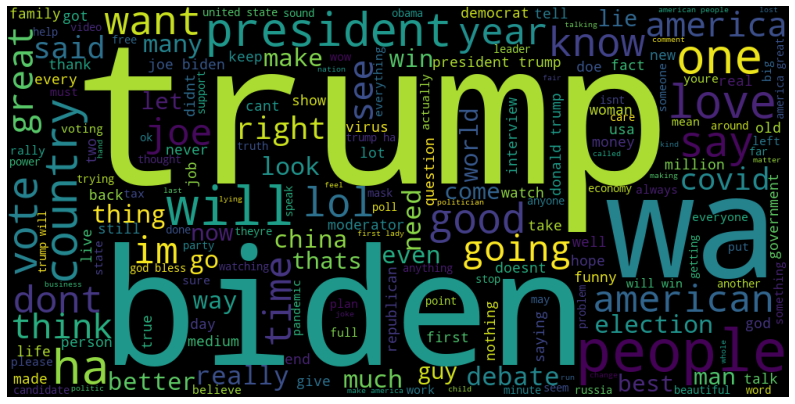

In [89]:
DP.Comments_WordCloud(df)

# Train Test Split

In [91]:
import numpy as np
from sklearn.model_selection import train_test_split
class DataFrame_Preprocessor():

    
    def __init__(self):
        
        
        print("Preprocessor object created")
        
        
    def preprocess(self,df):
        
        df['sentiment'] = np.where(df['sentiment'] == 'pos', 1, 0)
        
        x = df['Comment']
        
        y = df['sentiment']
        
        return train_test_split(x,y,test_size=0.20, random_state=0)

In [92]:
PR = DataFrame_Preprocessor()

Preprocessor object created


In [93]:
X_train, X_test, y_train, y_test = PR.preprocess(df)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9384,), (2346,), (9384,), (2346,))

# Feature Engineering with Keras Tokenization

In [95]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text
from keras.utils import np_utils
from keras.models import Sequential
class Keras_Tokenizer():

    
    def __init__(self,max_features):
        
        self.max_features =6000
        
        
        print("Tokenizer object created")
        
        
    def __label_encoding(self,y_train):
        """
        Encode the given list of class labels
        :y_train_enc: returns list of encoded classes
        :labels: actual class labels
        """
        lbl_enc = LabelEncoder()

        y_train_enc = lbl_enc.fit_transform(y_train)
        labels = lbl_enc.classes_

        return y_train_enc, labels
    
    
    
    def __word_embedding(self,train, test, max_features, max_len=200):
        
        
        try:
            """ Keras Tokenizer class object """
            tokenizer = text.Tokenizer(num_words=max_features)
            tokenizer.fit_on_texts(train)

            train_data = tokenizer.texts_to_sequences(train)
            test_data = tokenizer.texts_to_sequences(test)

            """ Get the max_len """
            vocab_size = len(tokenizer.word_index) + 1

            """ Padd the sequence based on the max-length """
            x_train = sequence.pad_sequences(train_data, maxlen=max_len, padding='post')
            x_test = sequence.pad_sequences(test_data, maxlen=max_len, padding='post')
            """ Return train, test and vocab size """
            return tokenizer, x_train, x_test, vocab_size
        except ValueError as ve:
            raise(ValueError("Error in word embedding {}".format(ve)))
            
            
    def preprocess(self,X_train, X_test):
        
    
        return self.__word_embedding(X_train, X_test, self.max_features)

In [96]:
KT = Keras_Tokenizer(6000)

Tokenizer object created


In [97]:
tokenizer, x_pad_train, x_pad_valid, vocab_size = KT.preprocess(X_train, X_test)

In [98]:
x_pad_train.shape,x_pad_valid.shape,vocab_size

((9384, 200), (2346, 200), 13337)

# Bidirectional lstm RNN Modelling

In [182]:
from tensorflow import keras
class RNN_Bidirectional_lstm_Build_Pack():

    
    def __init__(self,
                 input_length,
                 output_length,
                 vocab_size,
                 optimizer,
                 loss,
                 metrics,
                 batch_size,
                 epochs,
                 verbose):
        
        self.input_length =200
        self.output_length= 200
        self.vocab_size = 13337
        self.optimizer = 'adam'
        self.loss = 'binary_crossentropy'
        self.metrics = ['acc']
        self.batch_size = 256
        self.epochs = 20
        self.verbose = 1
        
        
        
        print("Tokenizer object created")
        
    
    def build_rnn(self,vocab_size,output_dim, input_dim):

        model = Sequential([
            keras.layers.Embedding(self.vocab_size,output_dim = self.output_length,
                                  input_length = self.input_length),
            keras.layers.BatchNormalization(),
            keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True)),
            keras.layers.GlobalMaxPool1D(),
#             keras.layers.Dense(205),
#             keras.layers.Dropout(0.3),
            keras.layers.Dense(150),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(95),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(64),
            keras.layers.Dropout(0.1),
            keras.layers.Dense(32),
            keras.layers.Dense(2),
            keras.layers.Dense(output_dim, activation='sigmoid')
        ])

        return model
    
    
    def Compile_and_Fit(self,rnn_model):
    
        rnn_model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)


        rnn_model.fit(x_pad_train, 
                                y_train,
                                batch_size=self.batch_size,
                               epochs=self.epochs,
                               verbose= self.verbose)
        
        score = rnn_model.evaluate(x_pad_valid, y_test, verbose=1)
        
        print("Loss:%.3f Accuracy: %.3f" % (score[0], score[1]))
        
        return rnn_model

In [183]:
Rnn_Model = RNN_Bidirectional_lstm_Build_Pack(200,200,13337,'adam','binary_crossentropy',['acc'],256,10,1)

Tokenizer object created


In [184]:
rnn_model = Rnn_Model.build_rnn(vocab_size,1,200)
rnn_model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 200, 200)          2667400   
_________________________________________________________________
batch_normalization_8 (Batch (None, 200, 200)          800       
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 200, 512)          935936    
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 150)               76950     
_________________________________________________________________
dropout_70 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 95)              

In [185]:
rnn_model = Rnn_Model.Compile_and_Fit(rnn_model)

Epoch 1/20
37/37 [==============================] - 174s 5s/step - loss: 0.8154 - acc: 0.5822
Epoch 2/20
37/37 [==============================] - 175s 5s/step - loss: 0.4800 - acc: 0.7729
Epoch 3/20
37/37 [==============================] - 238s 6s/step - loss: 0.2361 - acc: 0.9090
Epoch 4/20
37/37 [==============================] - 308s 8s/step - loss: 0.1120 - acc: 0.9632
Epoch 5/20
37/37 [==============================] - 320s 9s/step - loss: 0.0481 - acc: 0.9850
Epoch 6/20
37/37 [==============================] - 346s 9s/step - loss: 0.0186 - acc: 0.9964
Epoch 7/20
37/37 [==============================] - 348s 9s/step - loss: 0.0116 - acc: 0.9973
Epoch 8/20
37/37 [==============================] - 346s 9s/step - loss: 0.0088 - acc: 0.9985
Epoch 9/20
37/37 [==============================] - 359s 10s/step - loss: 0.0064 - acc: 0.9984
Epoch 10/20
37/37 [==============================] - 342s 9s/step - loss: 0.0054 - acc: 0.9991
Epoch 11/20
37/37 [==============================] - 304s 

# Predictions

In [186]:
y_preds = rnn_model.predict(x_pad_valid)

print("y_preds Shape ::",y_preds.shape)


for arr in y_preds:
    for i in range(len(arr)):
        if arr[i]>0.5:
            arr[i] = 1
        else:
            arr[i] = 0

            
y_preds = y_preds.astype('int32')

pred_df = pd.DataFrame(y_preds, columns=['pred'])

print(pred_df.shape)
pred_df.head()

y_preds Shape :: (2346, 1)
(2346, 1)


,pred
0,0
1,1
2,0
3,0
4,0


In [188]:
pred_df.value_counts()

pred
0       1304
1       1042
dtype: int64

# Model Metrics

In [189]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(metrics.accuracy_score(y_test, pred_df))
        
print(metrics.confusion_matrix(y_test, pred_df))
        
print(metrics.classification_report(y_test, pred_df))

0.876385336743393
[[1198  184]
 [ 106  858]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1382
           1       0.82      0.89      0.86       964

    accuracy                           0.88      2346
   macro avg       0.87      0.88      0.87      2346
weighted avg       0.88      0.88      0.88      2346



# Serializing Model

In [178]:
model_json = rnn_model.to_json()
with open("rnn_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
rnn_model.save("rnn_model.h5", overwrite=False)

# Serializing Tokenizer

In [180]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)